In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from pylab import rcParams
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")
rcParams['figure.figsize'] = 6, 4.5


In [3]:
from sklearn.datasets import load_boston


In [4]:
boston = load_boston()
feature_names = boston.feature_names
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
X_train.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [8]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)


In [9]:
X_train_scaled.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [10]:
from sklearn.manifold import TSNE


In [11]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)


In [12]:
X_train_tsne = tsne.fit_transform(X_train_scaled)


In [13]:
X_train_tsne


array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

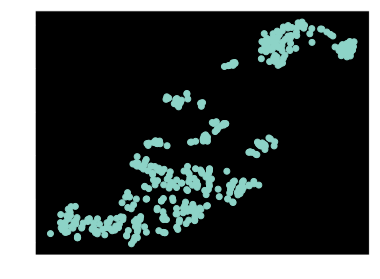

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()


In [15]:
from sklearn.cluster import KMeans


In [16]:
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state=42)


In [17]:
labels_train = kmeans.fit_predict(X_train_scaled)


In [18]:
pd.value_counts(labels_train)


2    191
1    127
0     86
dtype: int64

Text(0, 25, 'Кластер 2')

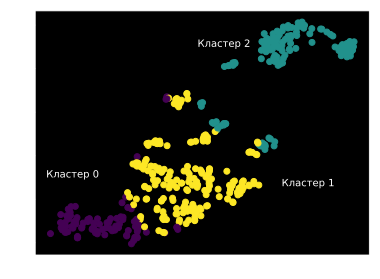

In [19]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-27, -5, 'Кластер 0')
plt.text(15, -7, 'Кластер 1')
plt.text(0, 25, 'Кластер 2')

In [20]:

X_train.loc[labels_train==0, 'CRIM'].mean()


0.07356558139534884

In [21]:
X_train.loc[labels_train==1, 'CRIM'].mean()


10.797028425196851

In [22]:
X_train.loc[labels_train==2, 'CRIM'].mean()


0.4216602094240837

In [23]:
y_train.loc[labels_train==0, 'price'].mean()


27.78837209302326

In [24]:
y_train.loc[labels_train==1, 'price'].mean()

16.165354330708663

In [25]:
y_train.loc[labels_train==2, 'price'].mean()



24.958115183246072